# Dataset de levantamiento de pesas y análisis propuesto

He encontrado un interesante dataset en Kaggle relacionado con levantamiento de pesas. Este conjunto de datos incluye información detallada sobre el rendimiento de levantadores de pesas en diferentes competencias y categorías, como peso corporal, edad, género, clase de peso, y los mejores registros de levantamientos.

Este dataset ofrece una oportunidad única para realizar diversos análisis, entre ellos:

+Tendencias de rendimiento según la categoría de peso.

+Impacto del género en los resultados promedio.

El análisis principal que me propongo realizar es validar una hipótesis relacionada con la edad óptima para el levantamiento de pesas. Según una nota que leí, se asegura que el mejor momento para alcanzar el máximo rendimiento en este deporte es a los 25 años.

Por lo tanto, la hipótesis que voy a trabajar será:
"Los levantadores de pesas alcanzan su rendimiento óptimo, medido en base a los mejores registros de levantamiento, a los 25 años."

Para responder a esta pregunta, planeo realizar un análisis exploratorio de los datos, segmentando los resultados según la edad de los atletas, y aplicar técnicas estadísticas para determinar si hay una diferencia significativa en el rendimiento a los 25 años frente a otras edades. También analizaré posibles factores que puedan influir, como la categoría de peso y el género.

Este análisis no solo permitirá confirmar o refutar esta hipótesis, sino que también podría revelar nuevos patrones o insights sobre el deporte del levantamiento de pesas y cómo los atletas evolucionan con el tiempo.

Como inforacion adicional en la discuplina de lenvatamiento de pesas o Halterofilia se tienen 4 oportunidades por tipo de levantamiento para obtener un mejor valor personal luego se suman los mejores intentos de cada tipo de levantamiento y se calcula el total.

## Preparacion de la data y analisis del Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\usuario\OneDrive\Escritorio\Estudio\Data-Science-Coder\Inputs\openpowerlifting.csv')

C:\Users\usuario\AppData\Local\Temp\ipykernel_21808\2565999333.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\usuario\OneDrive\Escritorio\Estudio\Data-Science-Coder\Inputs\openpowerlifting.csv')


In [180]:
#Analisis estructural del dataset
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [181]:
df.shape

(1423354, 37)

In [182]:
df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
count,757527.000000,1.406622e+06,337580.000000,333349.000000,323842.000000,3696.000000,1.031450e+06,499779.000000,493486.000000,478485.000000,...,363544.000000,356023.000000,339947.000000,9246.000000,1.081808e+06,1.313184e+06,1.304407e+06,1.304254e+06,1.304407e+06,1.273286e+06
mean,31.501570,8.422503e+01,114.102442,92.155846,30.056842,71.356870,1.740049e+02,83.892373,55.065745,-18.520481,...,162.700840,130.228378,12.995484,78.914945,1.872585e+02,3.956148e+02,2.882247e+02,2.960682e+02,2.718484e+02,4.854330e+02
std,13.371707,2.322011e+01,147.143021,173.701524,200.413385,194.522045,6.923931e+01,105.196350,130.302229,144.225726,...,108.681438,162.680134,215.052488,192.605159,6.232821e+01,2.011420e+02,1.231805e+02,1.249700e+02,1.175571e+02,1.133489e+02
min,0.000000,1.510000e+01,-555.000000,-580.000000,-600.500000,-550.000000,-4.775000e+02,-480.000000,-507.500000,-575.000000,...,-461.000000,-470.000000,-587.500000,-461.000000,-4.100000e+02,2.500000e+00,1.470000e+00,1.470000e+00,1.410000e+00,2.160000e+00
25%,21.000000,6.670000e+01,90.000000,68.000000,-167.500000,-107.840000,1.224700e+02,57.500000,-52.500000,-140.000000,...,125.000000,115.000000,-210.000000,-110.000000,1.383500e+02,2.325000e+02,1.979000e+02,2.048200e+02,1.828100e+02,4.028600e+02
50%,28.000000,8.180000e+01,147.500000,145.000000,110.000000,135.000000,1.678300e+02,105.000000,95.000000,-60.000000,...,180.000000,177.500000,117.500000,145.150000,1.850000e+02,3.787500e+02,3.052000e+02,3.120300e+02,2.859400e+02,4.780500e+02
75%,40.000000,9.915000e+01,200.000000,205.000000,192.500000,205.000000,2.175000e+02,145.000000,145.000000,117.500000,...,226.800000,230.000000,205.000000,210.000000,2.300000e+02,5.400000e+02,3.745600e+02,3.837600e+02,3.552800e+02,5.597000e+02
max,97.000000,2.580000e+02,555.000000,566.990000,560.000000,505.500000,5.750000e+02,467.500000,487.500000,478.540000,...,450.000000,460.400000,457.500000,418.000000,5.850000e+02,1.367500e+03,7.793800e+02,8.044000e+02,7.429600e+02,1.245930e+03


In [183]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division',
       'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
       'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg',
       'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')

In [3]:
#Creacion de columna adicional con categoria del peso
conditions = [
    (df['BodyweightKg'] <= 60), 
    (df['BodyweightKg'] > 60) & (df['BodyweightKg'] <= 70),
    (df['BodyweightKg'] > 70) & (df['BodyweightKg'] <= 80),
    (df['BodyweightKg'] > 80) & (df['BodyweightKg'] <= 90),
    (df['BodyweightKg'] > 90) & (df['BodyweightKg'] <= 100),
    (df['BodyweightKg'] > 100) & (df['BodyweightKg'] <= 110),
    (df['BodyweightKg'] > 110)
]
values = ['-60', '60-70', '70-80','80-90','90-100','100-110','110+']
df['weight_category'] = np.select(conditions, values, default='Unknown')


### Control de casos nulos

In [185]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 38 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423354 non-null  object 
 1   Sex              1423354 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406622 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Squat4Kg         3696 non-null     float64
 13  Best3SquatKg     1031450 non-null  float64
 14  Bench1Kg         499779 non-null   float64
 15  Bench2Kg         493486 non-null   float64
 16  Bench3Kg         4

Con esto podemos ver la cantidad de nulos en las columnas, en algunos casos no hay nulos, como en las primeras columas. En los casos de los levantamientos tiene sentido que haya nulos o ceros porque si el competidor no logra levantar en ese intento debera quedar 0 o "no completo"

En la columna de edad podemos ver una gran cantidad de nulos, tengo 2 opciones remplazarlos por la media de la misma columna o filtrarlos. (No hace falta correrlos se solucionara mas adelante)

In [ ]:
#Metodo 1 remplazar por la media
#df['Age'].fillna(df['Age'].mean(), inplace=True)


In [23]:
#Metodo 2 filtrar las filas con Nulos en "Age"
#Dado que es un dataset muy grande voy a proceder con este metodo para seguir el analisis.
#df = df.dropna(subset=['Age'])

### Chequeo de Outliers

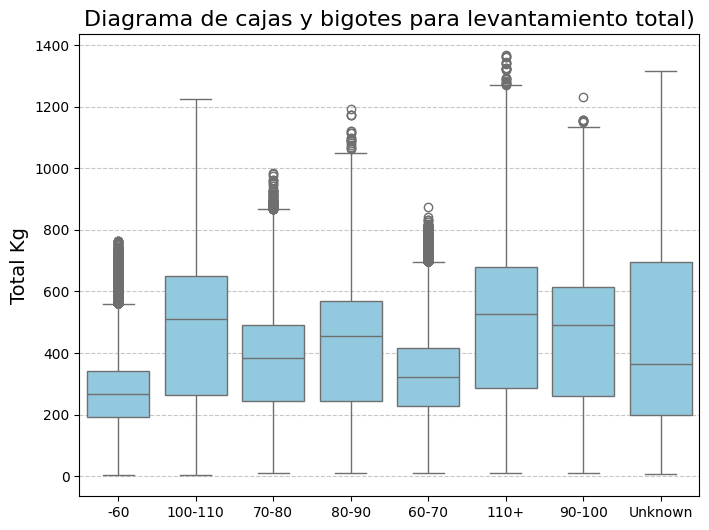

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,x='weight_category',y="TotalKg", color="skyblue")
plt.title("Diagrama de cajas y bigotes para levantamiento total)", fontsize=16)
plt.ylabel("Total Kg", fontsize=14)
plt.xlabel("") 
plt.grid(axis='y', linestyle='--', alpha=0.7)

Como se puede ver en el grafico anterior el Dataset cuenta con muchos Outliers, es decir valores fuera del 97,5% de la distribucion de las variables. A continuacion vamos a proceder a eliminarlos.

In [5]:
columns_to_check = ['BodyweightKg',
                       'TotalKg',
                       'Best3BenchKg',
                       'Best3DeadliftKg',
                       'Best3SquatKg']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

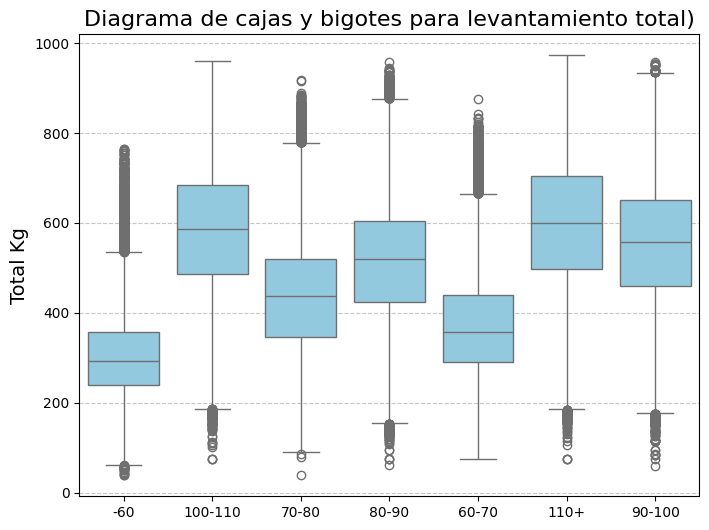

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,x='weight_category',y="TotalKg", color="skyblue")
plt.title("Diagrama de cajas y bigotes para levantamiento total)", fontsize=16)
plt.ylabel("Total Kg", fontsize=14)
plt.xlabel("") 
plt.grid(axis='y', linestyle='--', alpha=0.7)

Como se puede ver muchos de los outliers presentes han sido removidos

## Primer pregunta, relacion peso y total levantado

In [7]:
df = df.dropna(subset=['BodyweightKg',
                       'TotalKg',
                       'Best3BenchKg',
                       'Best3DeadliftKg',
                       'Best3SquatKg'])

Text(0, 0.5, 'Total Levantado')

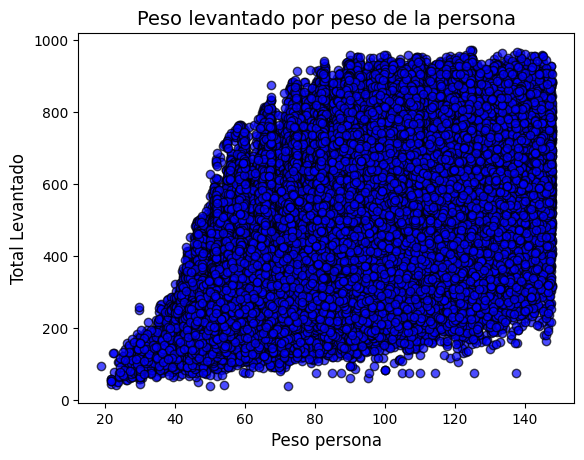

In [8]:
plt.scatter(df['BodyweightKg'], df['TotalKg'], color='blue', alpha=0.7, edgecolors='black')
plt.title('Peso levantado por peso de la persona', fontsize=14)
plt.xlabel('Peso persona', fontsize=12)
plt.ylabel('Total Levantado', fontsize=12)
#Son muchos puntos para ver en un grafico, probaremos con la categoria de peso mejor


In [9]:
categoria_peso = df.groupby('weight_category').agg({'TotalKg': 'mean',
                                                'Best3BenchKg': 'mean',
                                                'Best3DeadliftKg': 'mean',
                                                'Best3SquatKg':'mean'}
                                                ).reset_index()

categoria_peso['weight_category'] = pd.Categorical(categoria_peso['weight_category'], categories=values, ordered=True)

categoria_peso = categoria_peso.sort_values('weight_category')

In [ ]:
print(categoria_peso)

Text(0, 0.5, 'Peso levantado')

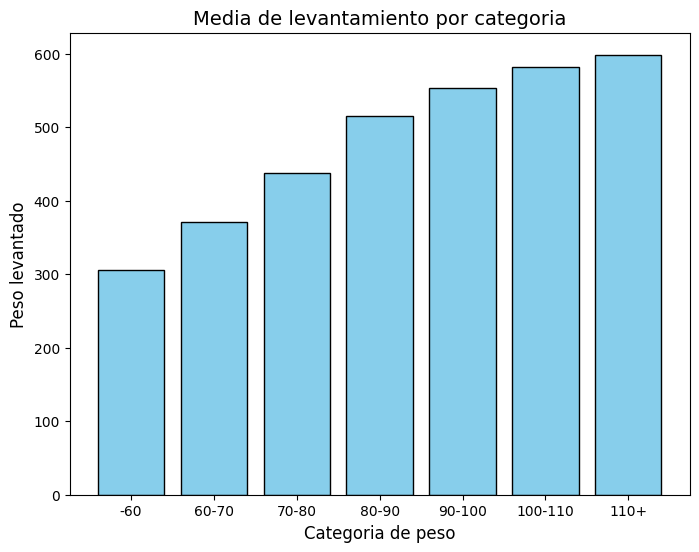

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(categoria_peso['weight_category'], categoria_peso['TotalKg'], color='skyblue', edgecolor='black')
plt.title('Media de levantamiento por categoria', fontsize=14)
plt.xlabel('Categoria de peso', fontsize=12)
plt.ylabel('Peso levantado', fontsize=12)

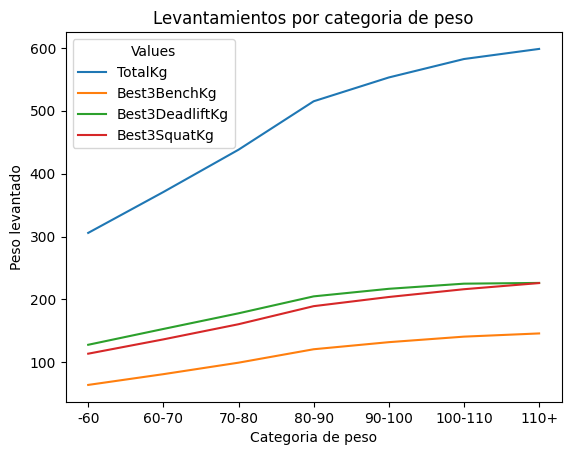

In [11]:
categoria_peso.set_index('weight_category', inplace=True)
categoria_peso.plot(kind='line')
plt.title('Levantamientos por categoria de peso')
plt.xlabel('Categoria de peso')
plt.ylabel('Peso levantado')
plt.legend(title='Values')

Conclusiones sobre el analisis de "Tendencias de rendimiento según la categoría de peso". Luego del analisis con las distintas visualizaciones que tenemos podemos llegar a conslusiones un poco intuitivas o por lo menos demostrarlas. Podemos ver un auemnto del peso levantado casi lineal con el peso de la persona. A mayor peso de la persona mas peso levanta esta. Podemos ver en el ultimo grafico de lineas que esta tendencia se reduce levemente con el aumento del peso y podemos ver un aumento en la magnitud del decrecimiento a partir de la categoria 80-90. Vemos que apartir de ese punto las tendencias de levantamiento son un poco menores.

Como otra observacion que podemos ver en el grafico una vez que lo desglosamos por categoria de levantamiento es una leve mejoria en las categorias mas pesadas en la disciplina de "Squat" contra una leve caida en la disciplina de "Deadlift" esto lleva a que ambas lineas se toquen en la categoria de mayor peso.

## Segunda pregunta Influencia del genero en el levantamiento de pesas

In [12]:
categoria_genero = df.groupby(['Sex','weight_category']).agg({'TotalKg': 'mean',
                                                'Best3BenchKg': 'mean',
                                                'Best3DeadliftKg': 'mean',
                                                'Best3SquatKg':'mean'}
                                                ).reset_index()

categoria_genero['weight_category'] = pd.Categorical(categoria_genero['weight_category'], categories=values, ordered=True)

categoria_genero = categoria_genero.sort_values(['Sex','weight_category'])


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700')])

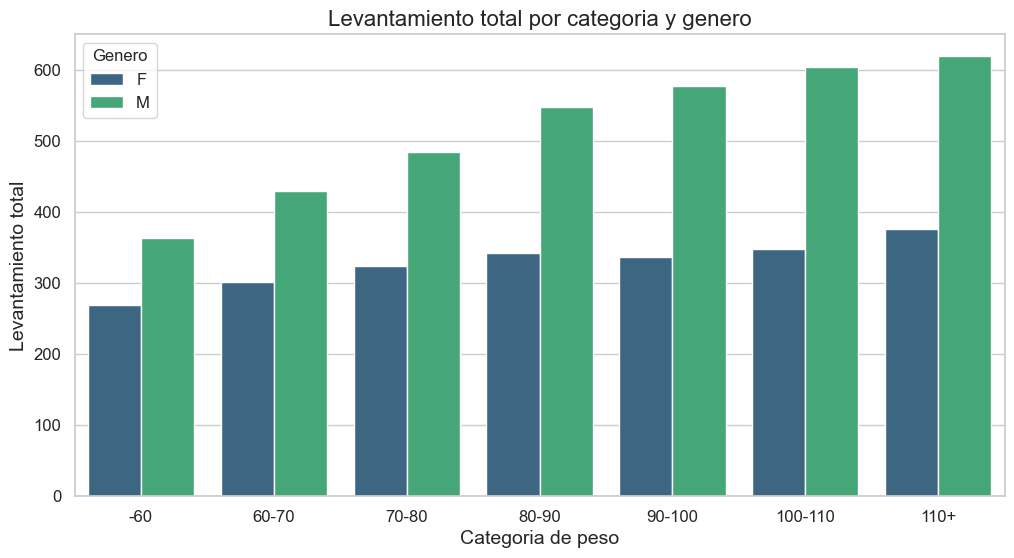

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    data=categoria_genero,
    x="weight_category",
    y="TotalKg",
    hue="Sex",
    palette="viridis"
)

plt.title("Levantamiento total por categoria y genero", fontsize=16)
plt.xlabel("Categoria de peso", fontsize=14)
plt.ylabel("Levantamiento total", fontsize=14)
plt.legend(title="Genero", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

Como se puede ver en el grafico anterior podemos ver que en estas disciplinas parece haber una diferencia en el genero. Las personas de Genero masculino parecen tener levantamientos mas altos que las personas de genero femenino. Por lo que podemos ver esta diferencia se va incrementando as medida que aumentas las categorias de peso.

## Hipotesis final, Se aclanca el optimo del levantamiento a los 25 años? Influencia de la edad sobre el levantamiento.

In [14]:
df = df.dropna(subset='Age')
df = df[df["Age"] >= 15]

Text(0, 0.5, 'Total Levantado')

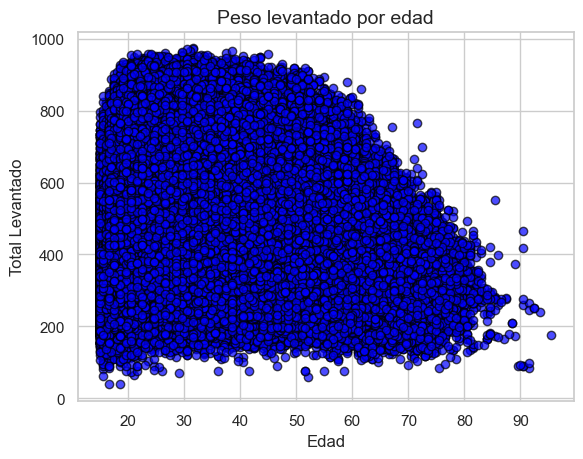

In [15]:
plt.scatter(df['Age'], df['TotalKg'], color='blue', alpha=0.7, edgecolors='black')
plt.title('Peso levantado por edad', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Total Levantado', fontsize=12)

In [16]:
categoria_edad = df.groupby('AgeClass').agg({'TotalKg': 'mean',
                                                'Best3BenchKg': 'mean',
                                                'Best3DeadliftKg': 'mean',
                                                'Best3SquatKg':'mean'}
                                                ).reset_index()

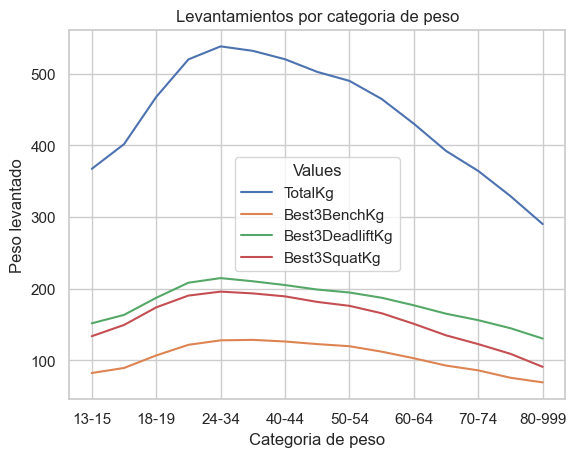

In [17]:
categoria_edad.set_index('AgeClass', inplace=True)
categoria_edad.plot(kind='line')
plt.title('Levantamientos por categoria de peso')
plt.xlabel('Categoria de peso')
plt.ylabel('Peso levantado')
plt.legend(title='Values')

En esta visualización podemos podemos ver una punto maximo en la categoria 24-34, lo cual es acorde a nuestra hipotesis pero necesitamos las edades en mas detalle para poder confirmar la hipotesis o refutarla.

In [18]:
df["Age"] = df["Age"].round().astype(int)

In [19]:
groupby_edad = df.groupby('Age').agg({'TotalKg': 'mean',
                                                'Best3BenchKg': 'mean',
                                                'Best3DeadliftKg': 'mean',
                                                'Best3SquatKg':'mean'}
                                                ).reset_index()

Text(0, 0.5, 'Levantamiento total')

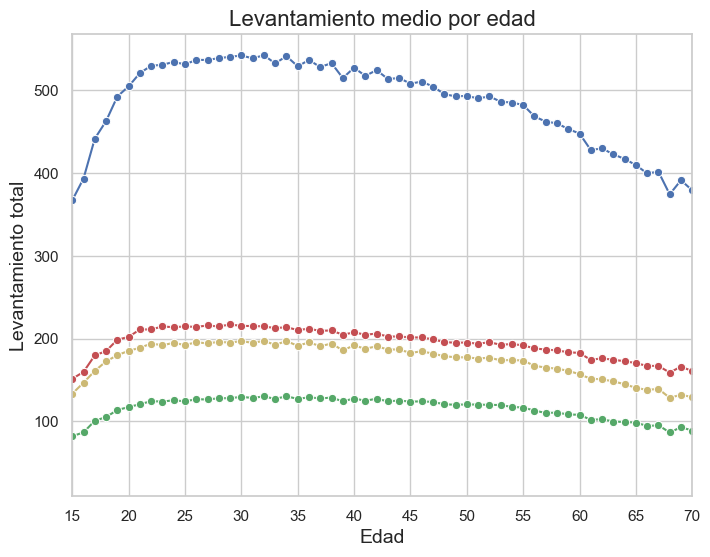

In [20]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=groupby_edad, x="Age",y='TotalKg', marker='o', color='b')
sns.lineplot(data=groupby_edad, x="Age",y='Best3BenchKg', marker='o', color='g')
sns.lineplot(data=groupby_edad, x="Age",y='Best3DeadliftKg', marker='o', color='r')
sns.lineplot(data=groupby_edad, x="Age",y='Best3SquatKg', marker='o', color='y')
plt.xlim(15, 70)
plt.xticks(range(15, 71, 5))
plt.title("Levantamiento medio por edad", fontsize=16)
plt.xlabel("Edad", fontsize=14)
plt.ylabel("Levantamiento total", fontsize=14)

En esta visualizacion si podemos ver bien claro en la edad con granularidad de 1 en 1 los partrones de crecimiento decrecimiento y maximo. No por gran diferencia pero podemos ver una tendencia de valores maximo en edades cercanas a los 30 años. Se puede ver una tendencia de crecimiento fuerte desde los 15 hasta los 20, luego una tendencia mas bien estable hasta los 35 teniendo un maximo en los 30. Y por ultimo un leve declive que se acentua apartir de los 50/55.
Viendo esta informacion podemos refutar la hipotesis inicial que afirma que la edad para un optimo levantamiento es a los 25 años y podemos mostrar que este optimo se encuentra cerca de los 30. La hipotesis inicial de igual manera se encuentra muy cerca de la realidad ya que la diferencia que podemos ver es muy leve.
Para lograr llegar a esta conclusion tuvimos que eliminar casos nulos y outliers, juntar la data y por ultimo visualizarla. Dado el tamaño del dataset se ha optado por la eliminacion de estas filas en vez de remplazarlas con valores como media, medianas o modas. Como podemos ver luego de todos estos remplazos terminamos con un dataset de 440.000 filas, todos de personas unicas y distintas. Mas que suficiente para demostrar que el analisis es correcto y refleja la realidad de manera imparcial y objetiva.